In [1]:
# 导入所需模块
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.initializers import TruncatedNormal
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras import backend as K

class SimpleVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # 创建Sequential 顺序模型层状结构
        model = Sequential()
        # 输入层的图片长度、宽度、深度（深度为RGB 3层）
        inputShape = (height, width, depth)
        chanDim = -1
        
        # 通过通道维所在位置修改chanDim
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # CONV => RELU => POOL
        # 添加卷积层，滤波器数量为32，卷积核大小为3*3（过滤器使用kernel_initializer参数指定的方法初始化为小的随机值）
        model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        #添加激活功能层，激活函数为relu
        model.add(Activation("relu"))
        #对数据做批规范化
        model.add(BatchNormalization(axis=chanDim))
        #添加最大池化层，池化窗口大小为2*2
        model.add(MaxPooling2D(pool_size=(2, 2)))
        #model.add(Dropout(0.25))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(64, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        #model.add(Dropout(0.25))

        # (CONV => RELU) * 3 => POOL
        model.add(Conv2D(128, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        #dropout层减少神经元，降低过拟合
        #model.add(Dropout(0.25))

        # FC层（全连接层）
        #添加Flatten层把多维的输入一维化
        model.add(Flatten())
        #添加全连接层，神经元点个数为512
        model.add(Dense(512,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        model.add(Dense(512,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        # softmax 分类
        #添加全连接层，神经元点个数为10
        model.add(Dense(classes,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Activation("softmax"))

        return model
    
class VGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # 创建Sequential 顺序模型层状结构
        model = Sequential()
        # 输入层的图片长度、宽度、深度（深度为RGB 3层）
        inputShape = (height, width, depth)
        chanDim = -1
        
        # 通过通道维所在位置修改chanDim
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
        model.add(Conv2D(64, (3, 3), padding="same",input_shape=inputShape,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        
        model.add(Conv2D(64, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(128, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        
        model.add(Conv2D(128, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(256, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        
        model.add(Conv2D(256, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        
        model.add(Conv2D(256, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(512, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        
        model.add(Conv2D(512, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        
        model.add(Conv2D(512, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(512, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        
        model.add(Conv2D(512, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        
        model.add(Conv2D(512, (3, 3), padding="same",kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        model.add(Dense(512,activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(512,activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(classes,activation='softmax'))
        return model 
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # 创建Sequential 顺序模型层状结构
        model = Sequential()
        # 输入层的图片长度、宽度、深度（深度为RGB 3层）
        inputShape = (height, width, depth)
        chanDim = -1
        
        # 通过通道维所在位置修改chanDim
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
        model.add(Conv2D(6, (5, 5),activation='sigmoid',input_shape=inputShape,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
        model.add(Conv2D(16, (5, 5),activation='sigmoid',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
        model.add(Flatten())
        model.add(Dense(120,activation='sigmoid'))
        model.add(Dense(84,activation='sigmoid'))
        model.add(Dense(classes,activation='softmax'))
        return model
class AlexNet:
    @staticmethod
    def build(width, height, depth, classes):
        # 创建Sequential 顺序模型层状结构
        model = Sequential()
        # 输入层的图片长度、宽度、深度（深度为RGB 3层）
        inputShape = (height, width, depth)
        chanDim = -1
        
        # 通过通道维所在位置修改chanDim
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
        model.add(Conv2D(96, (3, 3),input_shape=inputShape,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
        
        model.add(Conv2D(256, (3, 3),kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
        
        model.add(Conv2D(384, (3, 3),padding='same', activation='relu',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Conv2D(384, (3, 3),padding='same', activation='relu',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(Conv2D(256, (3, 3),padding='same', activation='relu',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
        
        model.add(Flatten())
        model.add(Dense(2048,activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2048,activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(classes,activation='softmax'))
        return model

In [2]:
import os

image_types = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")
 
def list_images(basePath, contains=None):
    # 返回有效的图片路径数据集
    return list_files(basePath, validExts=image_types, contains=contains)
 
def list_files(basePath, validExts=None, contains=None):
    # 遍历图片数据目录，生成每张图片的路径
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # 循环遍历当前目录中的文件名
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
                continue
 
            # 通过确定.的位置，从而确定当前文件的文件扩展名
            ext = filename[filename.rfind("."):].lower()
 
            # 检查文件是否为图像，是否应进行处理
            if validExts is None or ext.endswith(validExts):
                # 构造图像路径
                imagePath = os.path.join(rootDir, filename)
                yield imagePath

In [3]:
# 导入所需工具包
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os


# 读取数据和标签
print("------开始读取数据------")
data = []
labels = []

# 得到图像数据路径
imagePaths = sorted(list(list_images('F:/img')))
# 改变随机数生成器的种子
random.seed(42)
# 将一个图像地址列表中的元素打乱
random.shuffle(imagePaths)

# 遍历读取数据
for imagePath in imagePaths:
    # 读取图像数据
    image = cv2.imread(imagePath)
    # 缩放图像为64*64
    image = cv2.resize(image, (64, 64))
    data.append(image)
    # 读取标签
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

print(data[0])

# 对图像数据做scale操作
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(data[0])

# 数据集切分,验证集0.3
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.3, random_state=42)

# 转换标签为one-hot 编码格式
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY[0])

# 数据增强处理
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

Using TensorFlow backend.


------开始读取数据------
[[[ 61 135 110]
  [ 64 139 116]
  [ 69 128 107]
  ...
  [ 44  95  81]
  [ 43  90  70]
  [ 59 101  90]]

 [[ 52 119  93]
  [ 44 103  78]
  [ 38  79  60]
  ...
  [ 54  99  87]
  [ 53 106  91]
  [ 45  95  75]]

 [[ 38  82  60]
  [ 40  84  61]
  [ 43  90  70]
  ...
  [ 52 110  95]
  [ 48 108  87]
  [ 38  70  56]]

 ...

 [[161 162 162]
  [161 161 162]
  [161 162 162]
  ...
  [177 181 182]
  [177 181 182]
  [180 185 186]]

 [[163 163 163]
  [164 165 165]
  [164 166 166]
  ...
  [165 167 167]
  [166 168 168]
  [167 168 169]]

 [[164 164 164]
  [166 166 166]
  [164 165 166]
  ...
  [172 174 174]
  [171 174 174]
  [171 174 174]]]
[[[0.23921569 0.52941176 0.43137255]
  [0.25098039 0.54509804 0.45490196]
  [0.27058824 0.50196078 0.41960784]
  ...
  [0.17254902 0.37254902 0.31764706]
  [0.16862745 0.35294118 0.2745098 ]
  [0.23137255 0.39607843 0.35294118]]

 [[0.20392157 0.46666667 0.36470588]
  [0.17254902 0.40392157 0.30588235]
  [0.14901961 0.30980392 0.23529412]
  ...
  [0

In [5]:
# 设置初始化超参数
INIT_LR = 0.01
EPOCHS = 50
BS = 32

# 建立卷积神经网络
model = SimpleVGGNet.build(width=64, height=64, depth=3,classes=len(lb.classes_))

# 损失函数，编译模型
print("------准备训练网络------")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

# 训练网络模型
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)
"""
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=EPOCHS, batch_size=32)
"""




------准备训练网络------


D:\anaconda\anaconda\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
D:\anaconda\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
109/109 [==============================] - 81s 713ms/step - loss: 1.8935 - accuracy: 0.2881 - val_loss: 2.3114 - val_accuracy: 0.0960
Epoch 2/50
109/109 [==============================] - 77s 703ms/step - loss: 1.6661 - accuracy: 0.3690 - val_loss: 2.3868 - val_accuracy: 0.0960
Epoch 3/50
109/109 [==============================] - 75s 688ms/step - loss: 1.5921 - accuracy: 0.3979 - val_loss: 2.5284 - val_accuracy: 0.0993
Epoch 4/50
109/109 [==============================] - 73s 670ms/step - loss: 1.5425 - accuracy: 0.4256 - val_loss: 2.3254 - val_accuracy: 0.1567
Epoch 5/50
109/109 [==============================] - 75s 686ms/step - loss: 1.4451 - accuracy: 0.4671 - val_loss: 1.4661 - val_accuracy: 0.4460
Epoch 6/50
109/109 [==============================] - 74s 683ms/step - loss: 1.4152 - accuracy: 0.4729 - val_loss: 1.4570 - val_accuracy: 0.4693
Epoch 7/50
109/109 [==============================] - 74s 680ms/step - loss: 1.3586 - accuracy: 0.4974 - val_loss: 1.5858 - val_ac

'\nH = model.fit(trainX, trainY, validation_data=(testX, testY),\n    epochs=EPOCHS, batch_size=32)\n'

In [4]:
# 设置初始化超参数
INIT_LR = 0.01
EPOCHS = 50
BS = 32

# 建立卷积神经网络
model_vggnet = VGGNet.build(width=64, height=64, depth=3,classes=len(lb.classes_))

# 损失函数，编译模型
print("------准备训练网络------")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model_vggnet.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

# 训练网络模型
H_vggnet = model_vggnet.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)
"""
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=EPOCHS, batch_size=32)
"""




------准备训练网络------


D:\anaconda\anaconda\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
D:\anaconda\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
109/109 [==============================] - 237s 2s/step - loss: 2.3665 - accuracy: 0.1621 - val_loss: 2.3519 - val_accuracy: 0.0960
Epoch 2/50
109/109 [==============================] - 239s 2s/step - loss: 1.9731 - accuracy: 0.2587 - val_loss: 2.6883 - val_accuracy: 0.0960
Epoch 3/50
109/109 [==============================] - 232s 2s/step - loss: 1.8876 - accuracy: 0.2814 - val_loss: 2.9914 - val_accuracy: 0.0960
Epoch 4/50
109/109 [==============================] - 230s 2s/step - loss: 1.8364 - accuracy: 0.3002 - val_loss: 2.2778 - val_accuracy: 0.2080
Epoch 5/50
109/109 [==============================] - 229s 2s/step - loss: 1.7478 - accuracy: 0.3359 - val_loss: 1.9600 - val_accuracy: 0.2960
Epoch 6/50
109/109 [==============================] - 227s 2s/step - loss: 1.7139 - accuracy: 0.3480 - val_loss: 1.5726 - val_accuracy: 0.3833
Epoch 7/50
109/109 [==============================] - 237s 2s/step - loss: 1.6599 - accuracy: 0.3700 - val_loss: 1.6675 - val_accuracy: 0.3567

'\nH = model.fit(trainX, trainY, validation_data=(testX, testY),\n    epochs=EPOCHS, batch_size=32)\n'

In [6]:
# 设置初始化超参数
INIT_LR = 0.01
EPOCHS = 50
BS = 32

# 建立卷积神经网络
model_lenet = LeNet.build(width=64, height=64, depth=3,classes=len(lb.classes_))

# 损失函数，编译模型
print("------准备训练网络------")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model_lenet.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

# 训练网络模型
H_lenet = model_lenet.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)
"""
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=EPOCHS, batch_size=32)
"""




------准备训练网络------
Epoch 1/50
109/109 [==============================] - 13s 110ms/step - loss: 2.3956 - accuracy: 0.0952 - val_loss: 2.3073 - val_accuracy: 0.0967
Epoch 2/50
109/109 [==============================] - 12s 113ms/step - loss: 2.3064 - accuracy: 0.0833 - val_loss: 2.3041 - val_accuracy: 0.1040
Epoch 3/50
109/109 [==============================] - 13s 120ms/step - loss: 2.3057 - accuracy: 0.0911 - val_loss: 2.3057 - val_accuracy: 0.0953
Epoch 4/50
109/109 [==============================] - 13s 116ms/step - loss: 2.3050 - accuracy: 0.0995 - val_loss: 2.3060 - val_accuracy: 0.0967
Epoch 5/50
109/109 [==============================] - 12s 107ms/step - loss: 2.3056 - accuracy: 0.1032 - val_loss: 2.3048 - val_accuracy: 0.0953
Epoch 6/50
109/109 [==============================] - 12s 110ms/step - loss: 2.3052 - accuracy: 0.1012 - val_loss: 2.3047 - val_accuracy: 0.0960
Epoch 7/50
109/109 [==============================] - 12s 108ms/step - loss: 2.3054 - accuracy: 0.1015 - val_lo

'\nH = model.fit(trainX, trainY, validation_data=(testX, testY),\n    epochs=EPOCHS, batch_size=32)\n'

In [22]:
# 设置初始化超参数
INIT_LR = 0.01
EPOCHS = 50
BS = 32

# 建立卷积神经网络
model_alexnet = AlexNet.build(width=64, height=64, depth=3,classes=len(lb.classes_))

# 损失函数，编译模型
print("------准备训练网络------")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model_alexnet.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

# 训练网络模型
H_alexnet = model_alexnet.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)
"""
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=EPOCHS, batch_size=32)
"""

------准备训练网络------


D:\anaconda\anaconda\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
D:\anaconda\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
109/109 [==============================] - 129s 1s/step - loss: 2.2690 - accuracy: 0.1326 - val_loss: 2.3024 - val_accuracy: 0.0960
Epoch 2/50
109/109 [==============================] - 128s 1s/step - loss: 2.0336 - accuracy: 0.2240 - val_loss: 2.3117 - val_accuracy: 0.0960
Epoch 3/50
109/109 [==============================] - 128s 1s/step - loss: 1.8907 - accuracy: 0.2739 - val_loss: 2.4146 - val_accuracy: 0.0960
Epoch 4/50
109/109 [==============================] - 128s 1s/step - loss: 1.8219 - accuracy: 0.3068 - val_loss: 2.6314 - val_accuracy: 0.0967
Epoch 5/50
109/109 [==============================] - 128s 1s/step - loss: 1.7791 - accuracy: 0.3209 - val_loss: 1.9766 - val_accuracy: 0.2487
Epoch 6/50
109/109 [==============================] - 127s 1s/step - loss: 1.7219 - accuracy: 0.3475 - val_loss: 1.7861 - val_accuracy: 0.3393
Epoch 7/50
109/109 [==============================] - 128s 1s/step - loss: 1.6878 - accuracy: 0.3506 - val_loss: 1.5488 - val_accuracy: 0.4100

'\nH = model.fit(trainX, trainY, validation_data=(testX, testY),\n    epochs=EPOCHS, batch_size=32)\n'

------测试网络------
              precision    recall  f1-score   support

    airplane       0.80      0.85      0.82       143
        bird       0.60      0.62      0.61       154
         car       0.79      0.86      0.82       156
         cat       0.45      0.41      0.43       155
        deer       0.62      0.56      0.59       144
         dog       0.50      0.42      0.46       156
       horse       0.54      0.78      0.64       147
      monkey       0.61      0.49      0.54       145
        ship       0.81      0.73      0.77       143
       truck       0.69      0.72      0.71       157

    accuracy                           0.64      1500
   macro avg       0.64      0.64      0.64      1500
weighted avg       0.64      0.64      0.64      1500

------正在保存模型------
INFO:tensorflow:Assets written to: F://output/cnn.model\assets


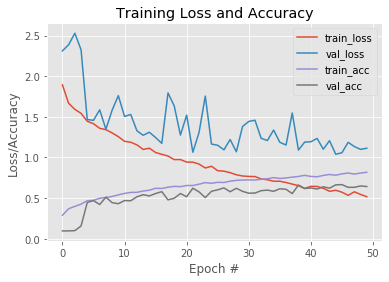

In [8]:
# 测试
print("------测试网络------")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

# 绘制结果曲线
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('F://output/cnn_plot.png')

# 保存模型
print("------正在保存模型------")
model.save('F://output/cnn.model')
f = open('F://output/cnn_lb.pickle', "wb")
f.write(pickle.dumps(lb))
f.close()

------测试网络------
              precision    recall  f1-score   support

    airplane       0.92      0.53      0.67       143
        bird       0.63      0.47      0.54       154
         car       0.81      0.60      0.69       156
         cat       0.44      0.44      0.44       155
        deer       0.57      0.69      0.62       144
         dog       0.48      0.40      0.44       156
       horse       0.56      0.69      0.62       147
      monkey       0.62      0.50      0.55       145
        ship       0.76      0.66      0.70       143
       truck       0.43      0.85      0.57       157

    accuracy                           0.58      1500
   macro avg       0.62      0.58      0.59      1500
weighted avg       0.62      0.58      0.58      1500

------正在保存模型------
INFO:tensorflow:Assets written to: F://output/cnn_vggnet.model\assets


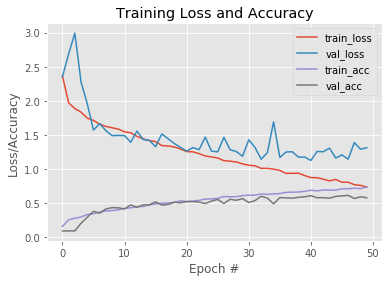

In [9]:
# 测试
print("------测试网络------")
predictions = model_vggnet.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

# 绘制结果曲线
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H_vggnet.history["loss"], label="train_loss")
plt.plot(N, H_vggnet.history["val_loss"], label="val_loss")
plt.plot(N, H_vggnet.history["accuracy"], label="train_acc")
plt.plot(N, H_vggnet.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('F://output/cnn_plot_vggnet.png')

# 保存模型
print("------正在保存模型------")
model.save('F://output/cnn_vggnet.model')
f = open('F://output/cnn_lb_vggnet.pickle', "wb")
f.write(pickle.dumps(lb))
f.close()

------测试网络------


D:\anaconda\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00       143
        bird       0.00      0.00      0.00       154
         car       0.00      0.00      0.00       156
         cat       0.00      0.00      0.00       155
        deer       0.00      0.00      0.00       144
         dog       0.00      0.00      0.00       156
       horse       0.00      0.00      0.00       147
      monkey       0.00      0.00      0.00       145
        ship       0.10      1.00      0.17       143
       truck       0.00      0.00      0.00       157

    accuracy                           0.10      1500
   macro avg       0.01      0.10      0.02      1500
weighted avg       0.01      0.10      0.02      1500

------正在保存模型------
INFO:tensorflow:Assets written to: F://output/cnn_lenet.model\assets


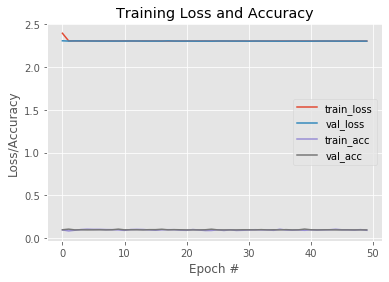

In [10]:
# 测试
print("------测试网络------")
predictions = model_lenet.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

# 绘制结果曲线
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H_lenet.history["loss"], label="train_loss")
plt.plot(N, H_lenet.history["val_loss"], label="val_loss")
plt.plot(N, H_lenet.history["accuracy"], label="train_acc")
plt.plot(N, H_lenet.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('F://output/cnn_plot_lenet.png')

# 保存模型
print("------正在保存模型------")
model.save('F://output/cnn_lenet.model')
f = open('F://output/cnn_lb_lenet.pickle', "wb")
f.write(pickle.dumps(lb))
f.close()

------测试网络------
              precision    recall  f1-score   support

    airplane       0.87      0.72      0.79       143
        bird       0.71      0.43      0.53       154
         car       0.74      0.85      0.79       156
         cat       0.29      0.69      0.41       155
        deer       0.45      0.62      0.52       144
         dog       0.47      0.04      0.08       156
       horse       0.51      0.44      0.47       147
      monkey       0.50      0.36      0.42       145
        ship       0.69      0.78      0.73       143
       truck       0.70      0.62      0.66       157

    accuracy                           0.55      1500
   macro avg       0.59      0.55      0.54      1500
weighted avg       0.59      0.55      0.54      1500

------正在保存模型------
INFO:tensorflow:Assets written to: F://output/cnn_alexnet.model\assets


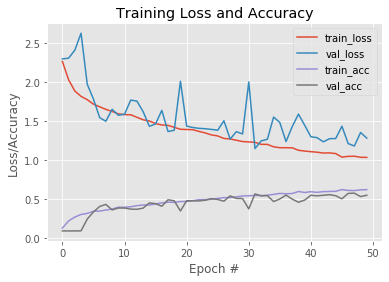

In [23]:
# 测试
print("------测试网络------")
predictions = model_alexnet.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

# 绘制结果曲线
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H_alexnet.history["loss"], label="train_loss")
plt.plot(N, H_alexnet.history["val_loss"], label="val_loss")
plt.plot(N, H_alexnet.history["accuracy"], label="train_acc")
plt.plot(N, H_alexnet.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('F://output/cnn_plot_alexnet.png')

# 保存模型
print("------正在保存模型------")
model.save('F://output/cnn_alexnet.model')
f = open('F://output/cnn_lb_alexnet.pickle', "wb")
f.write(pickle.dumps(lb))
f.close()

In [21]:
# 导入所需工具包
from tensorflow.keras.models import load_model
import argparse
import pickle
import cv2


# 加载测试数据并进行相同预处理操作
image = cv2.imread('F:/imgtest/2/7.png')
output = image.copy()
image = cv2.resize(image, (64, 64))

# scale图像数据
image = image.astype("float") / 255.0

# 对图像进行拉平操作
image = image.reshape((1, image.shape[0], image.shape[1],image.shape[2]))

# 读取模型和标签
print("------读取模型和标签------")
model = load_model('F://output/cnn.model')
lb = pickle.loads(open('F://output/cnn_lb.pickle', "rb").read())

# 预测
preds = model.predict(image)

# 得到预测结果以及其对应的标签
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

# 在图像中把结果画出来
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(0, 0, 255), 1)

# 绘图
cv2.imshow("Image", output)
cv2.waitKey(0)

------读取模型和标签------


-1

'2.5.0'